In [1]:
import numpy as np
import pandas as pd
import re
import requests
from collections import Counter
#import dog functions as df§

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
url = "https://raw.github.com/katyakraft/project_1/main/NYC_Dog_Licensing_Dataset_20240923.csv"

In [4]:

df = pd.read_csv(url)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/4252988408.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [5]:
df.columns = [col.replace(" ","_").lower() for col in df.columns]
df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016


In [6]:
df["breedname"].unique()

array(['American Pit Bull Mix / Pit Bull Mix', 'Boxer', 'Basenji', ...,
       'Hound Crossbreed', 'Airedale Terrier Crossbreed',
       'Pyrenean Mastiff'], dtype=object)

In [7]:
df[["breedname", "animalbirthyear"]].value_counts()

breedname                                           animalbirthyear
Unknown                                             2010               4607
                                                    2009               4240
                                                    2011               4119
                                                    2012               3884
                                                    2008               3766
                                                    2007               3197
                                                    2006               3041
                                                    2013               2956
                                                    2005               2570
                                                    2014               2389
Yorkshire Terrier                                   2016               2229
                                                    2017               2086
                    

In [8]:
#Dropping empty names

names_to_drop = ["UNKNOWN", "NAME NOT PROVIDED"]

df_cleaned = df[~df['animalname'].isin(names_to_drop)]

print(f"Number of rows after dropping 'UNKNOWN' and 'NAME NOT PROVIDED': {len(df_cleaned)}")

rows_removed = len(df) - len(df_cleaned)
print(f"Total rows removed: {rows_removed}")

Number of rows after dropping 'UNKNOWN' and 'NAME NOT PROVIDED': 594604
Total rows removed: 22286


In [9]:
df_lowercase = df_cleaned.map(lambda s: s.lower() if type(s) == str else s)

In [10]:
df_lowercase.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,09/12/2014,09/12/2017,2016
1,yogi,m,2010,boxer,10465.0,09/12/2014,10/02/2017,2016
2,ali,m,2014,basenji,10013.0,09/12/2014,09/12/2019,2016
3,queen,f,2013,akita crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,lola,f,2009,maltese,10028.0,09/12/2014,10/09/2017,2016


In [11]:
df_no_duplicates = df_lowercase.drop_duplicates()
df_no_duplicates.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,09/12/2014,09/12/2017,2016
1,yogi,m,2010,boxer,10465.0,09/12/2014,10/02/2017,2016
2,ali,m,2014,basenji,10013.0,09/12/2014,09/12/2019,2016
3,queen,f,2013,akita crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,lola,f,2009,maltese,10028.0,09/12/2014,10/09/2017,2016


In [12]:
df_no_duplicates.duplicated().sum()

0

In [13]:
df_no_duplicates['namelength'] = df_no_duplicates['animalname'].apply(lambda name: len(name)if pd.notnull(name) else 0)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/1691885961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['namelength'] = df_no_duplicates['animalname'].apply(lambda name: len(name)if pd.notnull(name) else 0)


In [14]:
new_df = df_no_duplicates.drop(["licenseexpireddate","licenseissueddate", "extract_year"], axis=1)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [15]:
#new_df["breedname"].value_counts()

In [16]:
new_df['breedname'] = new_df['breedname'].str.strip().str.lower()

In [17]:
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [18]:
new_df['breedname'] = new_df['breedname'].replace("/", " ")
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [19]:
new_df['breedname'] = new_df['breedname'].replace("/", " ", regex=False)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [20]:
new_df["breedname"] = new_df["breedname"].str.replace(r'\s+x$', '', regex=True)
new_df.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5
1,yogi,m,2010,boxer,10465.0,4
2,ali,m,2014,basenji,10013.0,3
3,queen,f,2013,akita crossbreed,10013.0,5
4,lola,f,2009,maltese,10028.0,4


In [21]:
def breed_groups(breedname):
    
    if re.search(r'pit bull|pitbull', breedname):  
        return 'pitbull'
    elif re.search(r'chihuahua', breedname): 
        return 'chihuahua'
    elif re.search(r'poodle', breedname):  
        return 'poodle'
    elif re.search(r'crossbread|crossbreed| mixed| cross breed|mix|cross bread' , breedname):  
        return 'crossbreed'
    elif re.search(r'dachshund|dachs hund' , breedname):  
        return 'dachshund'
    elif re.search(r'labrador' , breedname):  
        return 'labrador'
    elif re.search(r'beagle|beagel' , breedname):  
        return 'beagle'
    elif re.search(r'german shepherd' , breedname):  
        return 'german shepherd'
    elif re.search(r'golden' , breedname):  
        return 'golden retriever'
    elif re.search(r'shih tzu|shihtzu' , breedname):  
        return 'shih tzu'
    elif re.search(r'maltese' , breedname):  
        return 'maltese' 
    elif re.search(r'husky|siberianhusky' , breedname):  
        return 'siberian husky' 
    elif re.search(r'cocker spaniel' , breedname):  
        return 'cocker spaniel' 
    elif re.search(r'boxer' , breedname):  
        return 'boxer' 
    elif re.search(r'rotweiler' , breedname):  
        return 'rotweiler' 
    elif re.search(r'dalmatian' , breedname):  
        return 'dalmatian'
    elif re.search(r'yorkshire terrier' , breedname):  
        return 'yorkshire terrier'
    elif re.search(r'pomeranian' , breedname):  
        return 'pomeranian'
    elif re.search(r'havanese' , breedname):  
        return 'havanese'
    elif re.search(r'french bulldog' , breedname):  
        return 'french bulldog'
    elif re.search(r'jack russell terrier' , breedname):  
        return 'jack russell terrier'
    elif re.search(r'cavalier king charles spaniel' , breedname):  
        return 'cavalier king charles spaniel'
    elif re.search(r'shiba inu|shibainu' , breedname):  
        return 'shiba inu'
    elif re.search(r'not provided|unknown' , breedname):  
        return 'unknown'    
    elif re.search(r'pug|pugg' , breedname):  
        return 'pug'
    elif re.search(r'australian shepherd' , breedname):  
        return 'australian shepherd'
    elif re.search(r'boston terrier|bostonterrier|boston' , breedname):  
        return 'boston terrier'
    elif re.search(r'labradoodle' , breedname):  
        return 'labradoodle'
    elif re.search(r'bichon frise|bichon' , breedname):  
        return 'bichon frise'
    elif re.search(r'morkiamerican staffordshire terrier|morkie' , breedname):  
        return 'morkie'
    elif re.search(r'maltipoo' , breedname):  
        return 'maltipoo'
    elif re.search(r'miniature schnauzer|schnauzer, miniature|schnauzer miniature' , breedname):  
        return 'miniature schnauzer'
    elif re.search(r'miniature pinscher' , breedname):  
        return 'miniature pinscher'
    elif re.search(r'puggle' , breedname):  
        return 'puggle' 
    elif re.search(r'lhasa apso' , breedname):  
        return 'lhasa apso'
    elif re.search(r'pekingese' , breedname):  
        return 'pekingese'
    elif re.search(r'cockapoo ' , breedname):  
        return 'cockapoo '
    elif re.search(r'cairn terrier|cairn' , breedname):  
        return 'cairn terrier'
    elif re.search(r'border collie' , breedname):  
        return 'border collie'
    elif re.search(r'corgi' , breedname):  
        return 'pembroke welsh corgi'
    elif re.search(r'australian cattledog' , breedname):  
        return 'australian cattledog'
    elif re.search(r'jindo dog|jindo' , breedname):  
        return 'jindo dog'
    elif re.search(r'papillon' , breedname):  
        return 'papillon'
    elif re.search(r'wheaton terrier' , breedname):  
        return 'wheaton terrier'
    elif re.search(r'bernese' , breedname):  
        return 'bernese'
    elif re.search(r'chow chow|chowchow' , breedname):  
        return 'chow chow'
    else:
        pass



new_df['breedgroup'] = new_df['breedname'].apply(breed_groups)
new_df['breedgroup'].value_counts()
new_df.head()




,animalname,animalgender,animalbirthyear,breedname,zipcode,namelength,breedgroup
0,paige,f,2014,american pit bull mix / pit bull mix,10035.0,5,pitbull
1,yogi,m,2010,boxer,10465.0,4,boxer
2,ali,m,2014,basenji,10013.0,3,None
3,queen,f,2013,akita crossbreed,10013.0,5,crossbreed
4,lola,f,2009,maltese,10028.0,4,maltese


In [22]:
# API DATA

In [23]:
def get_breed_data():
    # Initialize an empty list to store breed data
    breed_list = []

    # Fetch the list of breeds from the API
    url = "https://api.thedogapi.com/v1/breeds"
    headers = {"x-api-key": "live_bbCrlls8Jw8I19PRwoKOY8c78YaFNHN60TaHSumPkzBWitHe3R3QTqIVteDxLAWs"}
    
    # Make the request to get all breeds
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        breeds = response.json()  # Get the list of all breeds

        # Loop through the breeds and extract relevant data
        for breed in breeds:
            breed_data = {
                "Breed Name": breed.get("name").lower(),
                "Life Span": breed.get("life_span"),
                "Temperament": breed.get("temperament"),
                "Breed Group": breed.get("breed_group"),
                "Weight": breed.get("weight", {}).get("metric"),
                "Height": breed.get("height", {}).get("metric"),
                "Bred For": breed.get('bred_for'),
                "Origin": breed.get("origin")
            }
            breed_list.append(breed_data)

        # Convert the list of dictionaries into a DataFrame
        df_breeds = pd.DataFrame(breed_list)
        df_breeds.columns = [col.replace(" ","_").lower() for col in df_breeds.columns]



        df_breeds.columns = [col.replace("_","").lower() for col in df_breeds.columns]
        return df_breeds


# Call the function to get breed list
df_breeds = get_breed_data()

df_breeds




,breedname,lifespan,temperament,breedgroup,weight,height,bredfor,origin
0,affenpinscher,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...",Toy,3 - 6,23 - 29,"Small rodent hunting, lapdog","Germany, France"
1,afghan hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy",Hound,23 - 27,64 - 69,Coursing and hunting,"Afghanistan, Iran, Pakistan"
2,african hunting dog,11 years,"Wild, Hardworking, Dutiful",None,20 - 30,76,A wild pack animal,
3,airedale terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...",Terrier,18 - 29,53 - 58,"Badger, otter hunting","United Kingdom, England"
4,akbash dog,10 - 12 years,"Loyal, Independent, Intelligent, Brave",Working,41 - 54,71 - 86,Sheep guarding,
5,akita,10 - 14 years,"Docile, Alert, Responsive, Dignified, Composed...",Working,29 - 52,61 - 71,Hunting bears,None
6,alapaha blue blood bulldog,12 - 13 years,"Loving, Protective, Trainable, Dutiful, Respon...",Mixed,25 - 41,46 - 61,Guarding,None
7,alaskan husky,10 - 13 years,"Friendly, Energetic, Loyal, Gentle, Confident",Mixed,17 - 23,58 - 66,Sled pulling,None
8,alaskan malamute,12 - 15 years,"Friendly, Affectionate, Devoted, Loyal, Dignif...",Working,29 - 45,58 - 64,"Hauling heavy freight, Sled pulling",None
9,american bulldog,10 - 12 years,"Friendly, Assertive, Energetic, Loyal, Gentle,...",Working,27 - 54,56 - 69,None,None


In [24]:
import pandas as pd
from collections import Counter

def count_characteristics(df_breeds):
    """ This function picks the 5 most popular characteristics of dog breeds """    
    # Combine all characteristics into a single list
    all_characteristics = []
    for characteristics in df_breeds["temperament"]:  
        if isinstance(characteristics, str):
            all_characteristics.extend(characteristics.split(', '))
    
    # Count characteristics
    characteristic_counts = Counter(all_characteristics)
    
    # Convert to DataFrame and shorten
    result_characteristics = pd.DataFrame.from_dict(characteristic_counts, orient='index', columns=['Count'])
    result_characteristics = result_characteristics.sort_values('Count', ascending=False)
    result_characteristics = result_characteristics.head(5)
    

    return result_characteristics

def add_columns(df_breeds, result_characteristics):
    """ This function adds new columns with boolean values of the 5 most popular characteristics """    

    for characteristic in result_characteristics.index:  
        df_breeds[characteristic] = df_breeds['temperament'].str.contains(characteristic, case=False)

    return df_breeds




# Count characteristics and add columns
result_characteristics = count_characteristics(df_breeds)

count_characteristics(df_breeds)

add_columns(df_breeds,result_characteristics)

df_breeds.columns = [col.replace(" ","_").lower() for col in df_breeds.columns]



df_breeds.columns = [col.replace("_","").lower() for col in df_breeds.columns]
df_breeds.head()

def breed_groups(breedname):
    
    if re.search(r'pit bull|pitbull', breedname):  
        return 'pitbull'
    elif re.search(r'chihuahua', breedname): 
        return 'chihuahua'
    elif re.search(r'poodle', breedname):  
        return 'poodle'
    elif re.search(r'crossbread|crossbreed| mixed| cross breed|mix|cross bread' , breedname):  
        return 'crossbreed'
    elif re.search(r'dachshund|dachs hund' , breedname):  
        return 'dachshund'
    elif re.search(r'labrador' , breedname):  
        return 'labrador'
    elif re.search(r'beagle|beagel' , breedname):  
        return 'beagle'
    elif re.search(r'german shepherd' , breedname):  
        return 'german shepherd'
    elif re.search(r'golden' , breedname):  
        return 'golden retriever'
    elif re.search(r'shih tzu|shihtzu' , breedname):  
        return 'shih tzu'
    elif re.search(r'maltese' , breedname):  
        return 'maltese' 
    elif re.search(r'husky|siberianhusky|siberian husky' , breedname):  
        return 'siberian husky' 
    elif re.search(r'cocker spaniel' , breedname):  
        return 'cocker spaniel' 
    elif re.search(r'boxer' , breedname):  
        return 'boxer' 
    elif re.search(r'rotweiler' , breedname):  
        return 'rotweiler' 
    elif re.search(r'dalmatian' , breedname):  
        return 'dalmatian'
    elif re.search(r'yorkshire terrier' , breedname):  
        return 'yorkshire terrier'
    elif re.search(r'pomeranian' , breedname):  
        return 'pomeranian'
    elif re.search(r'havanese' , breedname):  
        return 'havanese'
    elif re.search(r'french bulldog' , breedname):  
        return 'french bulldog'
    elif re.search(r'jack russell terrier' , breedname):  
        return 'jack russell terrier'
    elif re.search(r'cavalier king charles spaniel' , breedname):  
        return 'cavalier king charles spaniel'
    elif re.search(r'shiba inu|shibainu' , breedname):  
        return 'shiba inu'
    elif re.search(r'not provided|unknown' , breedname):  
        return 'unknown'    
    elif re.search(r'pug|pugg' , breedname):  
        return 'pug'
    elif re.search(r'australian shepherd' , breedname):  
        return 'australian shepherd'
    elif re.search(r'boston terrier|bostonterrier|boston' , breedname):  
        return 'boston terrier'
    elif re.search(r'labradoodle' , breedname):  
        return 'labradoodle'
    elif re.search(r'bichon frise|bichon' , breedname):  
        return 'bichon frise'
    elif re.search(r'morkiamerican staffordshire terrier|morkie' , breedname):  
        return 'morkie'
    elif re.search(r'maltipoo' , breedname):  
        return 'maltipoo'
    elif re.search(r'miniature schnauzer|schnauzer, miniature|schnauzer miniature' , breedname):  
        return 'miniature schnauzer'
    elif re.search(r'miniature pinscher' , breedname):  
        return 'miniature pinscher'
    elif re.search(r'puggle' , breedname):  
        return 'puggle' 
    elif re.search(r'lhasa apso' , breedname):  
        return 'lhasa apso'
    elif re.search(r'pekingese' , breedname):  
        return 'pekingese'
    elif re.search(r'cockapoo ' , breedname):  
        return 'cockapoo '
    elif re.search(r'cairn terrier|cairn' , breedname):  
        return 'cairn terrier'
    elif re.search(r'border collie' , breedname):  
        return 'border collie'
    elif re.search(r'corgi' , breedname):  
        return 'pembroke welsh corgi'
    elif re.search(r'australian cattledog' , breedname):  
        return 'australian cattledog'
    elif re.search(r'jindo dog|jindo' , breedname):  
        return 'jindo dog'
    elif re.search(r'papillon' , breedname):  
        return 'papillon'
    elif re.search(r'wheaton terrier' , breedname):  
        return 'wheaton terrier'
    elif re.search(r'bernese' , breedname):  
        return 'bernese'
    elif re.search(r'chow chow|chowchow' , breedname):  
        return 'chow chow'
    else:
       pass 


df_breeds['breedgroup'] = df_breeds['breedname'].apply(breed_groups)



# Replace 'None' in the 'breedgroup' column with values from the 'breedname' column
df_breeds.loc[df_breeds['breedgroup'].isna(), 'breedgroup'] = df_breeds['breedname']




#drop duplicates of breedgroup names
df_breeds = df_breeds.drop_duplicates(subset=["breedgroup"])
#df_breeds['breedgroup'].value_counts()

df_breeds.shape

(168, 13)

In [25]:
merged_df = pd.merge(new_df, df_breeds, on='breedgroup', how='left')


merged_df.loc[merged_df['breedgroup'].isna(), 'breedgroup'] = merged_df['breedname_x']
merged_df['breedgroup'].isnull().sum()

merged_df.drop(columns=["breedname_y"], inplace=True, errors='raise')

merged_df = merged_df.rename(columns={'animalname': 'animal_name', 
                                      'animalgender': 'animal_gender', 
                                      'animalbirthyear': 'animal_birthyear', 
                                      'breedname_x': 'breed_name', 
                                      'namelength': 'name_length',
                                      'breedgroup': 'breed_group',
                                      'bredfor': 'bred_for'
                                     })

# Adding data for Chihuahua and Dachshund
dog_data = {
    'chihuahua': {
        'breed_group': 'chihuahua',
        'lifespan': '12-20 years',
        'temperament': 'Devoted, Lively, Alert',
        'weight': '1-6 pounds (0.5-2.7 kg)',
        'height': '5-8 inches (13-20 cm)',
        'bred_for': 'Companionship',
        'origin': 'Mexico',
        'intelligent': True,
        'affectionate': True,
        'alert': True,
        'friendly': True,
        'loyal': True
    },
    'dachshund': {
        'breed_group': 'dachshund',
        'lifespan': '12-16 years',
        'temperament': 'Clever, Stubborn, Devoted',
        'weight': '16-32 pounds (7-14.5 kg)',
        'height': '8-9 inches (20-23 cm)',
        'bred_for': 'Scent hound, hunting badgers',
        'origin': 'Germany',
        'intelligent': True,
        'affectionate': True,
        'alert': True,
        'friendly': False,
        'loyal': True
    }
}

# Update the DataFrame
for breed, data in dog_data.items():
    # Check if the breed exists in the DataFrame
    if breed in merged_df['breed_group'].values:
        
        for column, value in data.items():
            merged_df.loc[merged_df['breed_group'] == breed, column] = value
            
#capitalize names
merged_df['animal_name'] = merged_df['animal_name'].str.capitalize()

#drop unused columns
merged_df = merged_df.drop(["lifespan","temperament", "height", "bred_for", "origin", "zipcode"], axis=1)

In [26]:
merged_df.head()

,animal_name,animal_gender,animal_birthyear,breed_name,name_length,breed_group,weight,intelligent,affectionate,alert,friendly,loyal
0,Paige,f,2014,american pit bull mix / pit bull mix,5,pitbull,14 - 27,True,True,False,True,True
1,Yogi,m,2010,boxer,4,boxer,23 - 32,True,False,False,True,True
2,Ali,m,2014,basenji,3,basenji,NaN,NaN,NaN,NaN,NaN,NaN
3,Queen,f,2013,akita crossbreed,5,crossbreed,NaN,NaN,NaN,NaN,NaN,NaN
4,Lola,f,2009,maltese,4,maltese,2 - 3,True,True,False,False,False


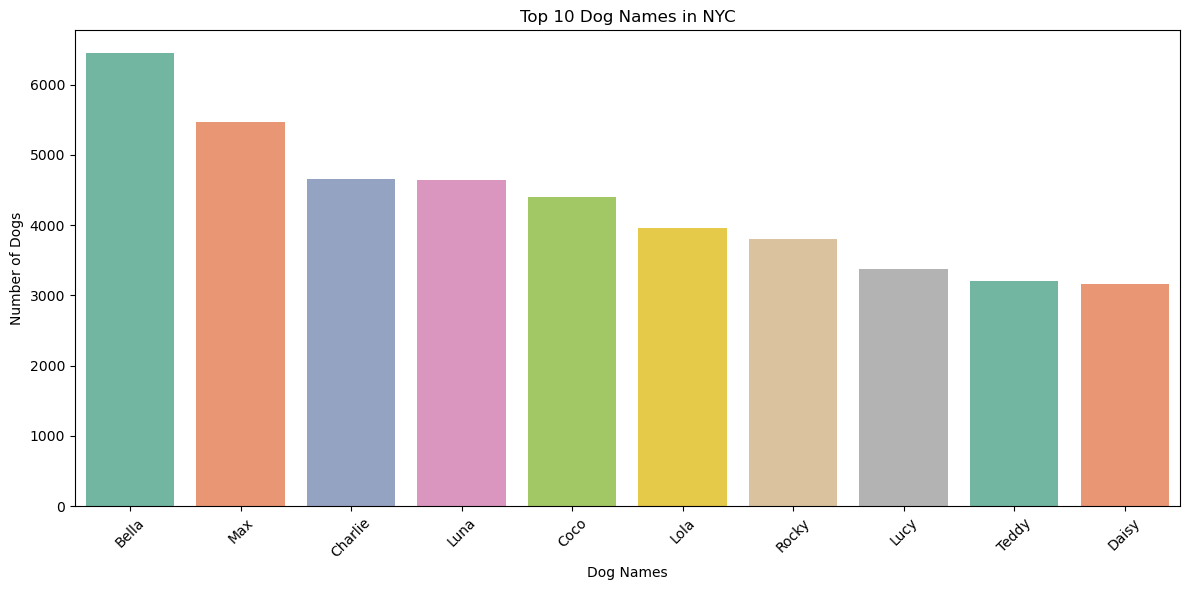

In [90]:

#top 10 dog names
top_names = merged_df['animal_name'].value_counts().head(10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation (replace with your actual DataFrame)
# merged_df = your_actual_dataframe

# Step 1: Calculate the top 10 dog names
top_names = merged_df['animal_name'].value_counts().head(10)

# Step 2: Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_names.index, y=top_names.values, palette='Set2')

# Step 3: Add title and labels
plt.title('Top 10 Dog Names in NYC')
plt.xlabel('Dog Names')
plt.ylabel('Number of Dogs')

# Step 4: Rotate x labels for better readability
plt.xticks(rotation=45)

# Step 5: Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
top_names = ["Bella", "Max", "Charlie", "Luna", "Coco"] 

In [28]:

#remove invalid birth years 
merged_df['animal_birthyear'] = pd.to_numeric(merged_df['animal_birthyear'], errors='coerce')

merged_df.head()

,animal_name,animal_gender,animal_birthyear,breed_name,name_length,breed_group,weight,intelligent,affectionate,alert,friendly,loyal
0,Paige,f,2014.0,american pit bull mix / pit bull mix,5,pitbull,14 - 27,True,True,False,True,True
1,Yogi,m,2010.0,boxer,4,boxer,23 - 32,True,False,False,True,True
2,Ali,m,2014.0,basenji,3,basenji,NaN,NaN,NaN,NaN,NaN,NaN
3,Queen,f,2013.0,akita crossbreed,5,crossbreed,NaN,NaN,NaN,NaN,NaN,NaN
4,Lola,f,2009.0,maltese,4,maltese,2 - 3,True,True,False,False,False


In [29]:

#create a copy with valid birth years
only_with_birthyear_df = merged_df.dropna(subset=['animal_birthyear'])

In [30]:

# Calculate the total number of dogs registered per year
total_dogs_per_year = only_with_birthyear_df.groupby('animal_birthyear')['animal_name'].count()


In [31]:
  #remove invalid birth years 
merged_df['animal_birthyear'] = pd.to_numeric(merged_df['animal_birthyear'], errors='coerce')
#create a copy with valid birth years
only_with_birthyear_df = merged_df.dropna(subset=['animal_birthyear'])
only_with_birthyear_df['animal_birthyear'] = pd.to_numeric(only_with_birthyear_df['animal_birthyear'].astype(int), errors='coerce')

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/3190960938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_with_birthyear_df['animal_birthyear'] = pd.to_numeric(only_with_birthyear_df['animal_birthyear'].astype(int), errors='coerce')


In [32]:
only_with_birthyear_df.head(80)

,animal_name,animal_gender,animal_birthyear,breed_name,name_length,breed_group,weight,intelligent,affectionate,alert,friendly,loyal
0,Paige,f,2014,american pit bull mix / pit bull mix,5,pitbull,14 - 27,True,True,False,True,True
1,Yogi,m,2010,boxer,4,boxer,23 - 32,True,False,False,True,True
2,Ali,m,2014,basenji,3,basenji,NaN,NaN,NaN,NaN,NaN,NaN
3,Queen,f,2013,akita crossbreed,5,crossbreed,NaN,NaN,NaN,NaN,NaN,NaN
4,Lola,f,2009,maltese,4,maltese,2 - 3,True,True,False,False,False
5,Ian,m,2006,unknown,3,unknown,NaN,NaN,NaN,NaN,NaN,NaN
6,Buddy,m,2008,unknown,5,unknown,NaN,NaN,NaN,NaN,NaN,NaN
7,Chewbacca,f,2012,labrador retriever crossbreed,9,crossbreed,NaN,NaN,NaN,NaN,NaN,NaN
8,Heidi-bo,f,2007,dachshund smooth coat,8,dachshund,16-32 pounds (7-14.5 kg),True,True,True,False,True
9,Massimo,m,2009,"bull dog, french",7,"bull dog, french",NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# group by year and stack to use name as index
result = only_with_birthyear_df[only_with_birthyear_df['animal_name'].isin(top_names)].groupby(['animal_name', 'animal_birthyear'])['animal_name'].count().unstack(fill_value=0)

result

animal_birthyear,1930,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
animal_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bella,0,4,2,0,0,0,9,7,22,42,78,163,152,269,274,351,476,445,400,517,495,417,500,427,415,358,277,222,92,35
Charlie,1,0,0,0,1,3,9,15,23,39,86,163,101,176,197,226,260,251,325,294,377,396,390,271,271,270,265,150,72,23
Coco,0,1,0,1,1,6,22,12,22,63,81,90,208,131,207,244,299,296,255,296,265,264,232,314,232,271,278,173,101,31
Luna,0,0,0,0,0,0,2,7,11,8,21,29,52,64,113,100,139,124,175,265,293,351,451,454,463,491,465,347,162,50
Max,0,0,4,1,5,8,23,35,34,83,80,147,191,298,275,360,357,361,337,307,340,421,452,364,275,274,189,145,86,20


In [34]:

# Filter the DataFrame for years from 2000
filtered_df = only_with_birthyear_df[only_with_birthyear_df['animal_birthyear'] >= 2000]
filtered_df['animal_birthyear'] = filtered_df['animal_birthyear'].astype(int)
# Calculate total dogs registered per year for the filtered DataFrame
total_dogs_per_year = filtered_df.groupby('animal_birthyear')['animal_name'].count()


total_dogs_per_year.head(50)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/697182878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['animal_birthyear'] = filtered_df['animal_birthyear'].astype(int)


animal_birthyear
2000     1732
2001     2357
2002     3700
2003     6157
2004     8718
2005    12307
2006    15926
2007    20288
2008    23973
2009    27594
2010    30275
2011    31139
2012    33531
2013    35893
2014    38041
2015    41042
2016    41436
2017    39461
2018    35707
2019    33221
2020    35073
2021    22150
2022    12165
2023     3985
Name: animal_name, dtype: int64

In [35]:
# Normalize the result DataFrame by the total number of dogs per year
# Ensure the indices match
normalized_result = (result / total_dogs_per_year) * 1000
normalized_result.head(50)

animal_birthyear,1930,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
animal_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bella,NaN,NaN,NaN,NaN,NaN,NaN,5.196305,2.969877,5.945946,6.821504,8.947006,13.244495,9.544142,13.259069,11.429525,12.720157,15.722543,14.290761,11.929259,14.403923,13.012276,10.160324,12.066802,10.820810,11.622371,10.776316,7.897813,10.022573,7.562680,8.782936
Charlie,NaN,NaN,NaN,NaN,NaN,NaN,5.196305,6.364022,6.216216,6.334254,9.864648,13.244495,6.341831,8.675079,8.217578,8.190186,8.587944,8.060631,9.692523,8.191012,9.910360,9.648653,9.412105,6.867540,7.589548,8.127389,7.555670,6.772009,5.918619,5.771644
Coco,NaN,NaN,NaN,NaN,NaN,NaN,12.702079,5.091218,5.945946,10.232256,9.291122,7.312911,13.060404,6.457019,8.634714,8.842502,9.876135,9.505764,7.604903,8.246733,6.966168,6.432435,5.598996,7.957224,6.497325,8.157491,7.926325,7.810384,8.302507,7.779172
Luna,NaN,NaN,NaN,NaN,NaN,NaN,1.154734,2.969877,2.972973,1.299334,2.408809,2.356383,3.265101,3.154574,4.713636,3.623976,4.591247,3.982145,5.219051,7.383055,7.702216,8.552215,10.884255,11.505030,12.966645,14.779808,13.258062,15.665914,13.316893,12.547051
Max,NaN,NaN,NaN,NaN,NaN,NaN,13.279446,14.849385,9.189189,13.480591,9.176417,11.944422,11.992967,14.688486,11.471238,13.046314,11.791908,11.593179,10.050401,8.553200,8.937725,10.257785,10.908389,9.224297,7.701571,8.247795,5.388761,6.546275,7.069462,5.018821


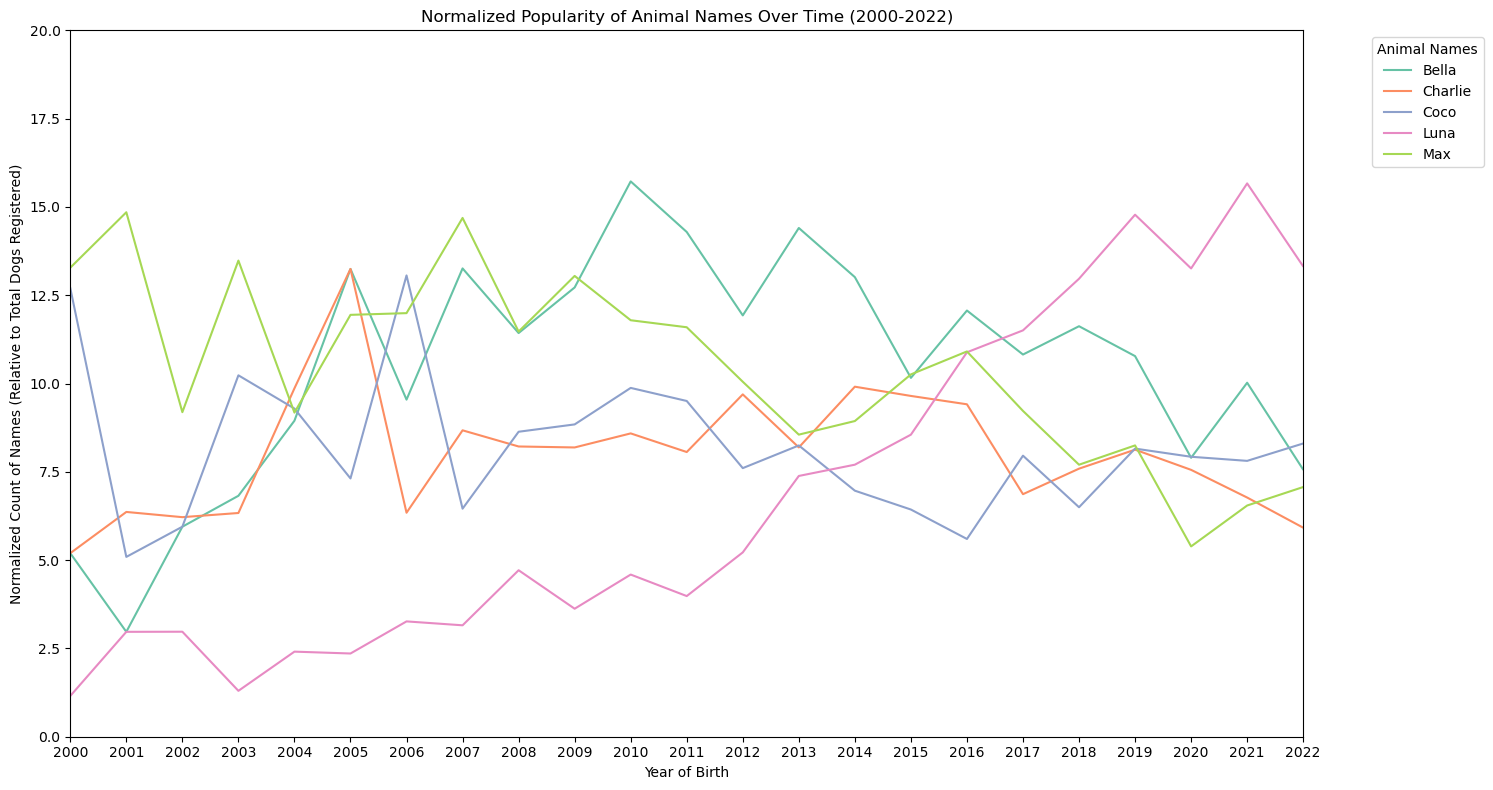

In [36]:
import seaborn as sns

# Generate the color palette
color = sns.color_palette('Set2', len(normalized_result.columns))

# Plot the normalized data
normalized_result.T.plot(figsize=(15, 8), color=color)

plt.title('Normalized Popularity of Animal Names Over Time (2000-2022)')
plt.xlabel('Year of Birth')
plt.ylabel('Normalized Count of Names (Relative to Total Dogs Registered)')
plt.xlim(2000, 2022)  # Keep the x-axis range the same
plt.ylim(0, 20)  # Set the y-axis limits

# Set x-ticks to be integer years only
plt.xticks(range(2000, 2023))  # Adjust the range according to your data

# Add the legend outside the plot
plt.legend(title='Animal Names', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure layout fits well
plt.tight_layout()

# Display the plot
plt.show()


In [37]:


#charlie in 2005 - charlie and the chocolate factory movie came out

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/2218748007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_with_birthyear_df['animal_birthyear'] = only_with_birthyear_df['animal_birthyear'].astype(int)


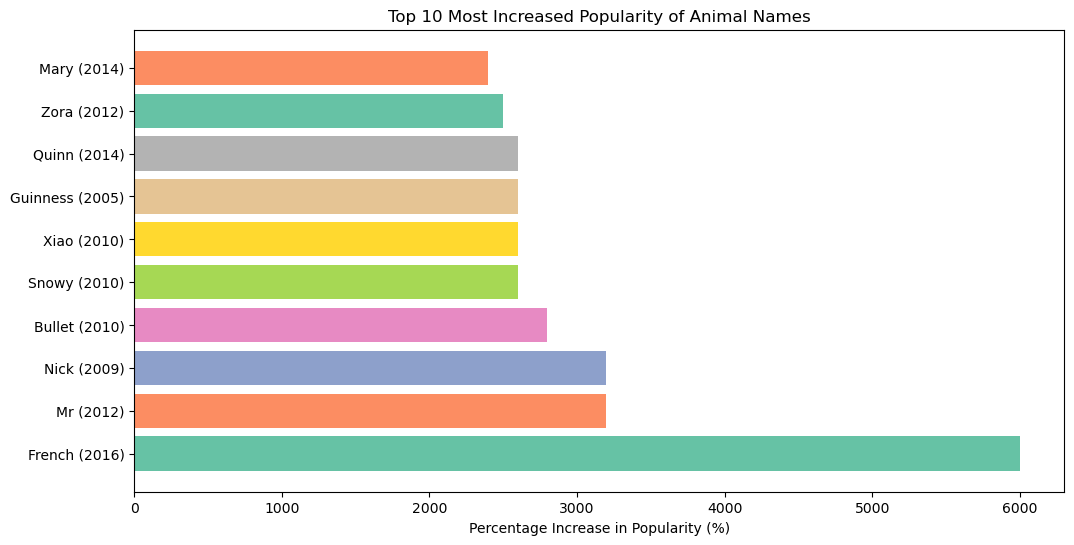

In [38]:



colors = sns.color_palette('Set2')

# Define the names to exclude
names_to_exclude = ['Name', 'Dachshund', 'Unknow', 'Unknown', 'None', 'Unkown'] 
only_with_birthyear_df['animal_birthyear'] = only_with_birthyear_df['animal_birthyear'].astype(int)

# Step 1: Calculate the total count of each name per year
name_counts = only_with_birthyear_df.groupby(['animal_birthyear', 'animal_name']).size().reset_index(name='count')

# Step 2: Exclude specific names
name_counts = name_counts[~name_counts['animal_name'].isin(names_to_exclude)]

# Step 3: Calculate the percentage change
name_counts['percentage_change'] = name_counts.groupby('animal_name')['count'].pct_change()

# Step 4: Filter for rows with non-null percentage changes
name_changes = name_counts[name_counts['percentage_change'].notna()]

# Step 5: Identify the top 10 increases in popularity
top_increases = name_changes.sort_values(by='percentage_change', ascending=False).head(10)

# Step 6: Create a bar graph
plt.figure(figsize=(12, 6))

plt.barh(top_increases['animal_name'] + " (" + top_increases['animal_birthyear'].astype(str) + ")", 
         top_increases['percentage_change'] * 100, color=colors)
plt.xlabel('Percentage Increase in Popularity (%)')
plt.title('Top 10 Most Increased Popularity of Animal Names')



plt.show()


In [39]:
# Group by 'animal_name' and 'animal_gender', count occurrences, drop "Dachshund" as name

name_gender_counts = merged_df.groupby(['animal_name', 'animal_gender']).size().unstack(fill_value=0)
name_gender_counts = name_gender_counts.drop('Dachshund', errors='ignore')
name_gender_counts = name_gender_counts.drop('.', errors='ignore')
name_gender_counts = name_gender_counts.drop('Shiba', errors='ignore')

# Calculate the difference between 'F' and 'M' counts
name_gender_counts['gender_difference'] = name_gender_counts['f'] - name_gender_counts['m']

# Calculate the total count ('all' column)
name_gender_counts['all_dogs'] = name_gender_counts['f'] + name_gender_counts['m']

# Filter for at least 30 dogs with a given name
name_gender_counts = name_gender_counts[name_gender_counts['all_dogs'] >= 45]


# Calculate the absolute difference between 'F' and 'M' counts
name_gender_counts['abs_difference'] = (name_gender_counts['f'] - name_gender_counts['m']).abs()

# Filter for small difference
name_gender_counts = name_gender_counts[name_gender_counts['abs_difference'] < 20]

# Sort by the absolute difference in ascending order to prioritize small differences
name_gender_counts = name_gender_counts.sort_values(by='all_dogs', ascending=False)

top_gender_neutral_names = name_gender_counts.head(10)

top_gender_neutral_names

animal_gender,f,m,gender_difference,all_dogs,abs_difference
animal_name,,,,,
Mochi,325,326,-1,651,1
Little,208,208,0,416,0
Midnight,166,177,-11,343,11
Panda,151,159,-8,310,8
Rory,98,113,-15,211,15
River,97,98,-1,195,1
Butter,94,101,-7,195,7
Baci,94,94,0,188,0
Miso,95,81,14,176,14


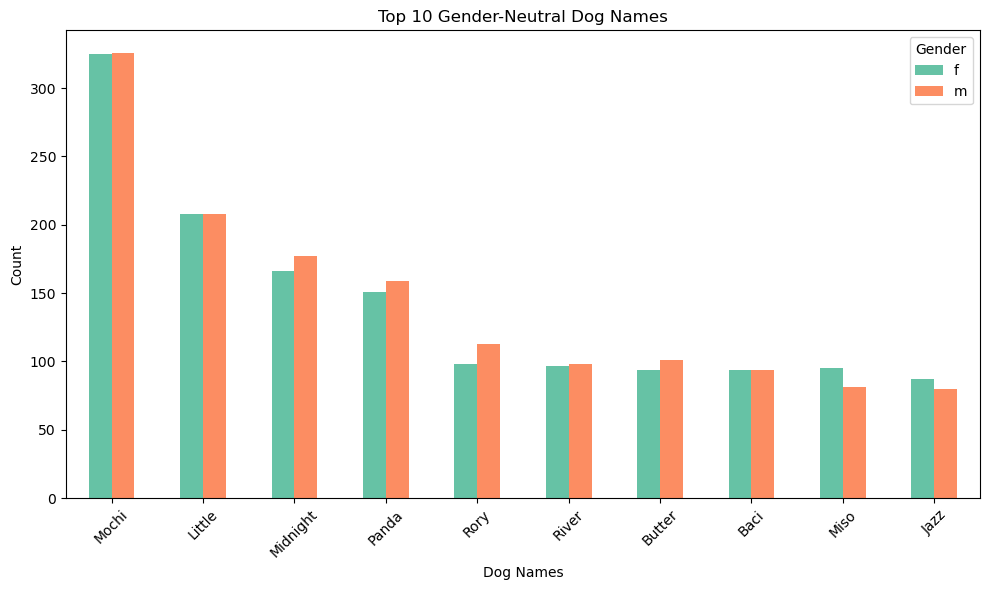

In [40]:
# Plotting
colors = sns.color_palette('Set2', len(top_increases))
top_gender_neutral_names[['f', 'm']].plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Top 10 Gender-Neutral Dog Names')
plt.xlabel('Dog Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_55083/4081109096.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_weight = name_counts_by_weight.groupby('weight').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


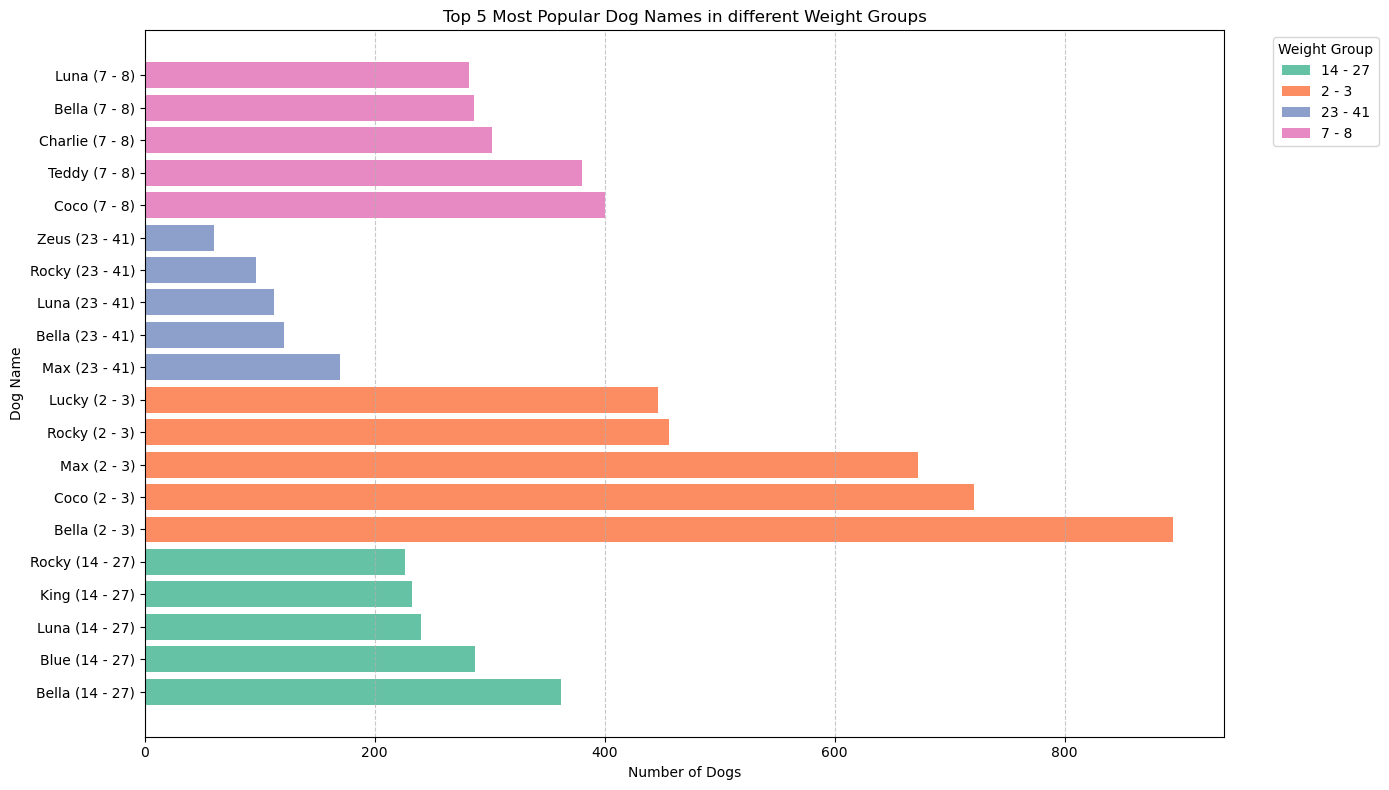

In [86]:

#exclude Name from names
merged_df = merged_df[merged_df['animal_name'] != "Name"]
# Get the weight groups (names of the weight groups)
top_weight_groups = ["2 - 3", "7 - 8", "14 - 27", "23 - 41"]

# Filter the DataFrame to include only the top weight groups
top_weight_groups_df = merged_df[merged_df['weight'].isin(top_weight_groups)]

# Group by weight category and name, then count occurrences
name_counts_by_weight = top_weight_groups_df.groupby(['weight', 'animal_name']).size().reset_index(name='count')

# Find the top 5 names for each weight group
top_names_by_weight = name_counts_by_weight.groupby('weight').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Step 2: Create a color mapping for each weight group
unique_weight_groups = top_names_by_weight['weight'].unique()
colors = sns.color_palette('Set2', len(unique_weight_groups))  # Get a distinct color for each weight group
weight_color_mapping = dict(zip(unique_weight_groups, colors))  # Map weight groups to colors

# Step 3: Plot the top names for each weight group with consistent colors
plt.figure(figsize=(14, 8))

# Loop through weight groups and plot each one with the assigned color
for weight_group in unique_weight_groups:
    group_data = top_names_by_weight[top_names_by_weight['weight'] == weight_group]
    plt.barh(group_data['animal_name'] + f" ({weight_group})", 
             group_data['count'], 
             color=weight_color_mapping[weight_group],  # Use the color for the weight group
             label=weight_group)

# Step 4: Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Step 5: Add title and labels
plt.xlabel('Number of Dogs')
plt.ylabel('Dog Name')
plt.title('Top 5 Most Popular Dog Names in different Weight Groups')

# Step 6: Improve legend visibility
plt.legend(title='Weight Group', loc='upper right', bbox_to_anchor=(1.15, 1))

# Step 7: Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
